# Simple Linear Regression

The code written isn't going to be optimized, as it isn't the goal of this notebook. The purpose of this notebook is to present to you an intuitive and easy way to understand how a simple linear Regression works. 

Linear regression is the simplest form of regression algorithms. Regression algorithms are used to predict a continuous value given certain data. For example, house prices and stock prices can be predicted using regression. 

For this example, we will just look at a two dimensional for better visualization of the process.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We will first create a small dataset

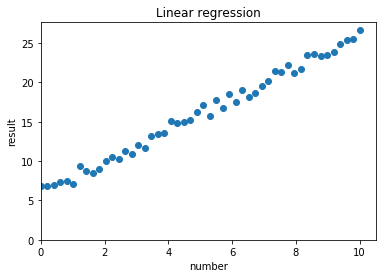

In [2]:
x = np.linspace(0,10,50)
y = np.array([number*2+5+2*np.random.rand() for number in x])
fig, ax = plt.subplots()
ax.scatter(x,y);
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
ax.set_xlabel('number');
ax.set_ylabel('result');
ax.set_title('Linear regression');

Alright! So here we have our data. What we want to do is to approximate the data to a linear function of the form:

$$f(x) = mx+b $$

Where m and b are two variable that will be define by the computer. The challenge here is to adjust m and b to lower the error that we have between the predicted values from $f(x)$ and our values.

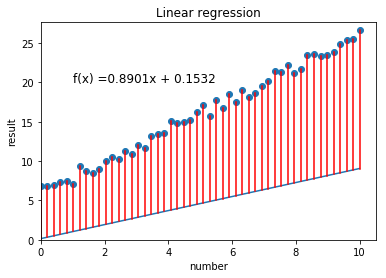

In [3]:
#Randomize m and b
m = np.random.rand()
b = np.random.rand()


#Create plot
fig, ax = plt.subplots()
ax.scatter(x,y);
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
# ax.set_xlim(xmin=4, xmax= 6)
ax.set_xlabel('number');
ax.set_ylabel('result');
ax.set_title('Linear regression');
plt.text(1, 20, 'f(x) ={}x + {}'.format(np.round(m,4), np.round(b,4)), fontsize=12);

#Create the first guessing line
ax.plot([0,10],[m*0+b,m*10+b]);

#Add error lines to plot
for i in range(0,len(x)):
    plt.plot([x[i], x[i]], [m*x[i]+b,y[i]], 'r')

The error is going to be the distance between the point and it's project value, as shown by the red line in the graph above.

To compute the error J, we will sum all of the distances, using the formula

$$ J(m,b) = \sum_{n=0}^{i}((mx^i+b)-y^i)^2 * \frac{1}{2i} $$

This formula seems daunting, but it's easy to understand. What we are doing here is taking the sum of every squared distance between the predicted point ($mx^i+b$) with it's corresponding actual value ($y^i$).

$x^i$ comes from our x array, while the $y^i$ comes from our y array.

So, for example $x^0$ would be x[0] and $y^0$ would be our y[0]

In [4]:
error = np.sum((m*x[i]+b- y[i])**2 for i in range(0,len(x)))*1/(2*len(x))
print(error)

69.90502513713719


Alright, so now we have an error of 72. That's pretty bad. Let's reduce it.
All we know is that the error is a function of m and b, so what we simply need to do is to adjust m and b to have a better result.

It's intuitive right? Change whatever parameters are responsible for the error. Since we cannot change the data, we can only change parameters that the computer has initially guessed. In this case, m and b.

How do we do this? Simply using simple derivatives. The best way to know how much we need to change a parameter is to see how influential is the parameter to the error. For this we will use partial derivatives.

Simply derive in function of one parameter, leaving the other as if it was a constant.

Let's do the partial derivative with respect to m of this function:

$$ J(m,b) = \sum_{n=0}^{i}((mx^i+b)-y^i)^2 * \frac{1}{2i} $$

$$ \Leftrightarrow \frac{\partial J(m,b)}{\partial m} = \frac{\partial}{\partial m} \sum_{n=0}^{i}((mx^i+b)-y^i)^2 * \frac{1}{2i} $$

Since we are deriving in function of m, every other variable will be treated as a constant, therefore we get

$$ \frac{\partial J(m,b)}{\partial m} = \frac{\partial}{\partial m} \sum_{n=0}^{i}((mx^i+b)-y^i)^2 * \frac{1}{2i} $$

$$ \Leftrightarrow\frac{\partial J(m,b)}{\partial m} =  \sum_{n=0}^{i}\frac{\partial}{\partial m}((mx^i+b)-y^i)^2 * \frac{1}{2i} $$


$$ \Leftrightarrow\frac{\partial J(m,b)}{\partial m} =  \sum_{n=0}^{i}2 * \frac{\partial}{\partial m}[(mx^i+b)-y^i)](mx^i+b)-y^i) * \frac{1}{2i} $$

This can be derived by simple chain rule. This leaves us with

$$\frac{\partial J(m,b)}{\partial m} =  \sum_{n=0}^{i}x^i*(mx^i+b)-y^i) * \frac{1}{i} $$

And we can do the same for the $\frac{\partial J(m,b)}{\partial b}$. In the end, we get two equations:


$$dm = \frac{\partial J(m,b)}{\partial m} =  \sum_{n=0}^{i}x^i*(mx^i+b)-y^i) * \frac{1}{i} $$
$$db = \frac{\partial J(m,b)}{\partial b} =  \sum_{n=0}^{i}(mx^i+b)-y^i) * \frac{1}{i} $$

This method of using the partial derivative to find out the variable's influence on the error is called **Gradient Descent**, and it is used in every algorithm.

Alright! Now we have our partial derivatives, it's time to update our function. What we will do is multiply this number by a constant and substract it from the original m and b. What we get is

$$  m = m - \alpha * dm$$
$$  b = b - \alpha * db$$


$\alpha$ is what we call the learning rate. It's a hyperparameter. A hyperparameter is a parameter that is defined by a human, not by the machine. The parameter is a regulating number that allows us to control how fast a computer can adjust the number. If the number is too small, then it will take a long time. If the number is too big, it will deajust itself very quickly.

Hyperparameters are complex, and they are very specific to each algorithm. There's a whole entire study about them, and when you become much more advanced in the field, you will eventually learn how to deal with them.


For this exercise, $\alpha$ is going to be set at 0.001

Now, since we have a new m, we can now use this new m to update the graph, let's see what we get.

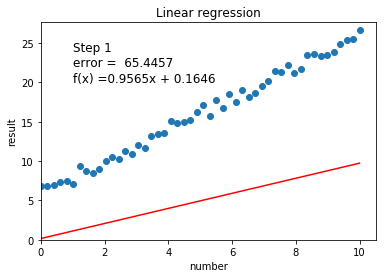

In [5]:
alpha = 0.001

merror = np.array([x[i]*(m*x[i]+b-y[i]) for i in range(0,len(x))])
dm = np.sum(merror)*1/len(x)

berror = np.array([m*x[i]+b-y[i] for i in range(0,len(x))])
db = np.sum(berror)*1/len(x)
m -= alpha*dm
b -= alpha*db

error = np.sum((m*x[i]+b- y[i])**2 for i in range(0,len(x)))*1/(2*len(x))
fig, ax = plt.subplots()
ax.scatter(x,y);
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
plt.text(1, 24, 'Step {}'.format(1), fontsize=12)
plt.text(1, 22, 'error =  {}'.format(np.round(error,4)), fontsize=12)
plt.text(1, 20, 'f(x) ={}x + {}'.format(np.round(m,4), np.round(b,4)), fontsize=12)
ax.set_xlabel('number');
ax.set_ylabel('result');
ax.set_title('Linear regression');
ax.plot([0,10],[b ,m*10+b], 'r');
plt.show();

Yes! The error has decreased! However, we still have a long way to go. But now, the only we need to do is iterate through the algorithm a defined number of times. Let's see what happens if we iterate through 50 times.

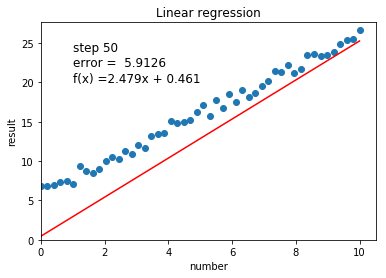

In [6]:
for _ in range(49):
    merror = np.array([x[i]*(m*x[i]+b-y[i]) for i in range(0,len(x))])
    dm = np.sum(merror)*1/len(x)

    berror = np.array([m*x[i]+b-y[i] for i in range(0,len(x))])
    db = np.sum(berror)*1/len(x)
    m -= alpha*dm
    b -= alpha*db

error = np.sum((m*x[i]+b- y[i])**2 for i in range(0,len(x)))*1/(2*len(x))
fig, ax = plt.subplots()
ax.scatter(x,y);
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
plt.text(1, 24, 'step {}'.format(50), fontsize=12)
plt.text(1, 22, 'error =  {}'.format(np.round(error,4)), fontsize=12)
plt.text(1, 20, 'f(x) ={}x + {}'.format(np.round(m,4), np.round(b,4)), fontsize=12)
ax.set_xlabel('number');
ax.set_ylabel('result');
ax.set_title('Linear regression');
ax.plot([0,10],[b ,m*10+b], 'r');
plt.show();

And now 100 times.

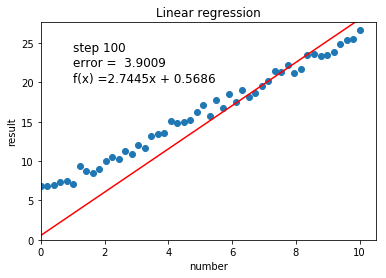

In [7]:
for _ in range(49):
    merror = np.array([x[i]*(m*x[i]+b-y[i]) for i in range(0,len(x))])
    dm = np.sum(merror)*1/len(x)

    berror = np.array([m*x[i]+b-y[i] for i in range(0,len(x))])
    db = np.sum(berror)*1/len(x)
    m -= alpha*dm
    b -= alpha*db

error = np.sum((m*x[i]+b- y[i])**2 for i in range(0,len(x)))*1/(2*len(x))
fig, ax = plt.subplots()
ax.scatter(x,y);
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
plt.text(1, 24, 'step {}'.format(100), fontsize=12)
plt.text(1, 22, 'error =  {}'.format(np.round(error,4)), fontsize=12)
plt.text(1, 20, 'f(x) ={}x + {}'.format(np.round(m,4), np.round(b,4)), fontsize=12)
ax.set_xlabel('number');
ax.set_ylabel('result');
ax.set_title('Linear regression');
ax.plot([0,10],[b ,m*10+b], 'r');
plt.show();

And 5000 times

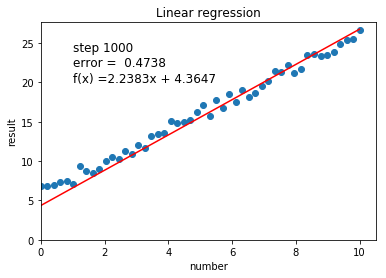

In [8]:
for _ in range(4900):
    merror = np.array([x[i]*(m*x[i]+b-y[i]) for i in range(0,len(x))])
    dm = np.sum(merror)*1/len(x)

    berror = np.array([m*x[i]+b-y[i] for i in range(0,len(x))])
    db = np.sum(berror)*1/len(x)
    m -= alpha*dm
    b -= alpha*db

error = np.sum((m*x[i]+b- y[i])**2 for i in range(0,len(x)))*1/(2*len(x))
fig, ax = plt.subplots()
ax.scatter(x,y);
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
plt.text(1, 24, 'step {}'.format(1000), fontsize=12)
plt.text(1, 22, 'error =  {}'.format(np.round(error,4)), fontsize=12)
plt.text(1, 20, 'f(x) ={}x + {}'.format(np.round(m,4), np.round(b,4)), fontsize=12)
ax.set_xlabel('number');
ax.set_ylabel('result');
ax.set_title('Linear regression');
ax.plot([0,10],[b ,m*10+b], 'r');
plt.show();

And there you have it! Our first linear regression! If we combine all our code without overlap,

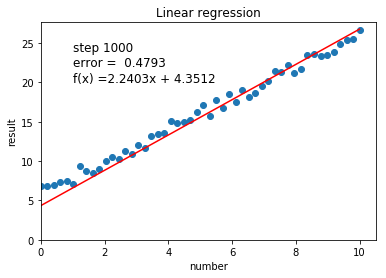

In [9]:
#Randomize m and b
m = np.random.rand()
b = np.random.rand()

for _ in range(4900):
    merror = np.array([x[i]*(m*x[i]+b-y[i]) for i in range(0,len(x))])
    dm = np.sum(merror)*1/len(x)

    berror = np.array([m*x[i]+b-y[i] for i in range(0,len(x))])
    db = np.sum(berror)*1/len(x)
    m -= alpha*dm
    b -= alpha*db

error = np.sum((m*x[i]+b- y[i])**2 for i in range(0,len(x)))*1/(2*len(x))
fig, ax = plt.subplots()
ax.scatter(x,y);
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
plt.text(1, 24, 'step {}'.format(1000), fontsize=12)
plt.text(1, 22, 'error =  {}'.format(np.round(error,4)), fontsize=12)
plt.text(1, 20, 'f(x) ={}x + {}'.format(np.round(m,4), np.round(b,4)), fontsize=12)
ax.set_xlabel('number');
ax.set_ylabel('result');
ax.set_title('Linear regression');
ax.plot([0,10],[b ,m*10+b], 'r');
plt.show();

We only have 12 lines of code (14 are to create the graph)! Incredible isn't it how with little lines of code we can create a linear regression.

This is the basis of many different linear regression algorithms. We can expand this to more dimensions, many more variables and trying more complex cost functions! If you still have some doubts, please ask! I am looking forward to clarifying your doubts! 


You've accomplished a milestone in your quest towards learning Machine Learning! Isn't it fascinating how, with little algebra, code and logic, we were able to produce such a useful and powerful tool? I believe that you can push yourself even further! I challenge you to optimize these lines of code, to get a faster output from the computer! There's so much you can improve this simple algorithm! It's a great exercise to start thinking about linear algebra and even other functions that exists in Python. Thank you very much for following! I wish you the best in your quest towards becoming Machine Learning Expert!.